In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
xs = np.linspace(-3, 2, 100)

ys_true = np.sin(xs * 2) + 0.1 * (-(xs ** 4) + (-xs ** 3) + 3 * (xs ** 2) - 7 * (xs))


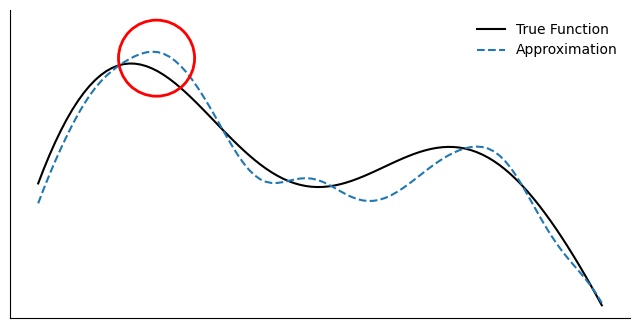

In [74]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# Original function
xs = np.linspace(-3, 2, 100)
ys_true = np.sin(xs * 2) + 0.1 * (-(xs ** 4) + (-xs ** 3) + 3 * (xs ** 2) - 7 * (xs))

# Smooth random noise for "approximation"
rng = np.random.default_rng(seed=3)
raw_noise = rng.normal(size=len(xs))
smooth_noise = gaussian_filter1d(raw_noise, sigma=5)  # smooth the noise

ys_approx = ys_true + 2 * smooth_noise

# Plot
plt.plot(xs, ys_true, label="True Function", c='k')
plt.plot(xs, ys_approx, label="Approximation", linestyle="--")
plt.scatter([-1.95], [2.8], facecolors="none", edgecolors="red", s=3000, linewidths=2, zorder=5)
plt.ylim(None, 4)
# plt.fill_between(xs, ys_true, ys_approx, color="gray", alpha=0.3, label="Error")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.legend(frameon=False)
plt.gcf().set_size_inches(8, 4)
plt.savefig('../../results/figures/schematics/cql_approximation.pdf')
plt.show()